ESERCIZIO SU METODO DI CAMPIONAMENTO, STO CERCANDO DI RITROVARE CON GENERAZIONE DI PUNTI RANDOM IL VALORE di omega_m della cosmologia LambdaCDM per DESI

PRIMO METODO PER CAMPIONARE: SI USA L'INVERSA DELLA CUMULATIVA

ATT: confronta con file di colab del 8/04, lì ci sono anche note mie, questo è fatto dal prof e caricato su aulaweb

In [118]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy.integrate import quad

In [119]:
# Read the Omega_m - Chi2 Table
omega_m_values, chi2_values = np.load("chi2_values.npy")

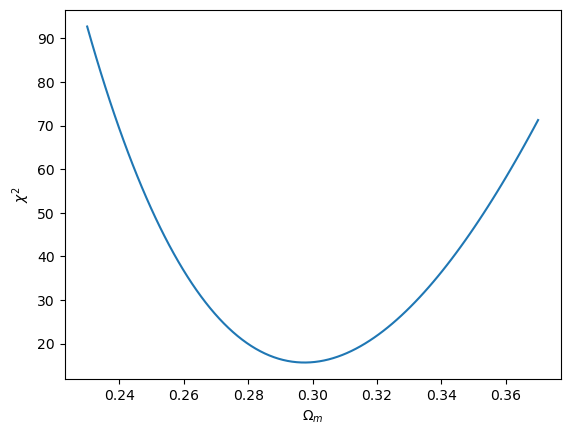

In [120]:
# Plot the Chi2-OmegaM values
plt.plot(omega_m_values, chi2_values)
plt.xlabel(r"$\Omega_m$")
plt.ylabel(r"$\chi^2$")
plt.show()

In [121]:
# Convert to (unnormalized) posterior
# We have implicitely assumed a flat prior on Omega M~[0.23, 0.37]
posterior = np.exp(-0.5 * chi2_values)

# Normalize the posterior
interp_posterior = interp1d(omega_m_values, posterior, kind="cubic", fill_value="extrapolate")
norm_posterior = quad(interp_posterior, a=0.23, b=0.37)

# Redefine the interpolator of the posterior, with normalized posterior now
interp_posterior = interp1d(omega_m_values, posterior/norm_posterior[0], kind="cubic", fill_value="extrapolate")


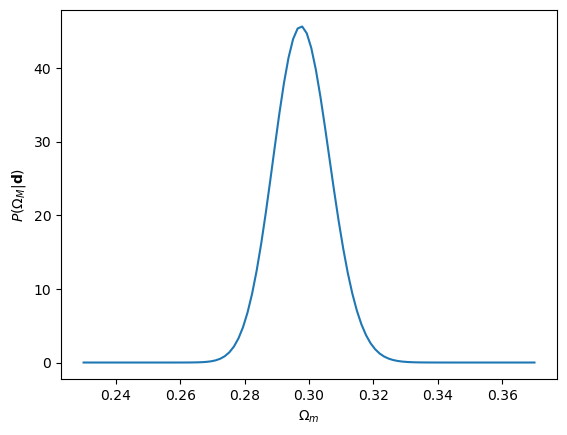

In [122]:
# Plot the log likelihood
plt.plot(omega_m_values, posterior/norm_posterior[0])
plt.xlabel(r"$\Omega_m$")
plt.ylabel(r"$P(\Omega_M|\mathbf{d})$")
plt.show()

posterior = posterior/norm_posterior[0]

# Sample from the posterior using the Inverse cumulative method

In [123]:
# Compute the cumulative of the posterior, by integration
cumfunc = np.array([quad(interp_posterior, a=0.23, b=om)[0] for om in omega_m_values])

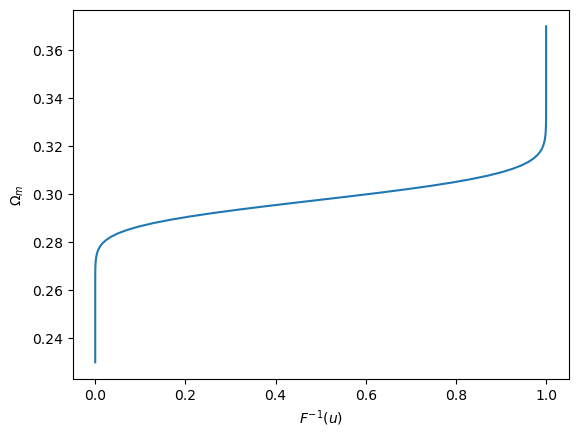

In [124]:
#Plot the normalized cumulative posterior
plt.plot(cumfunc, omega_m_values)
plt.xlabel("$F^{-1}(u)$")
plt.ylabel(r"$\Omega_m$")
plt.show()

In [125]:
# Create a continuous function from the grid
interp_inverse_cumulative = interp1d(cumfunc, omega_m_values, kind="linear")

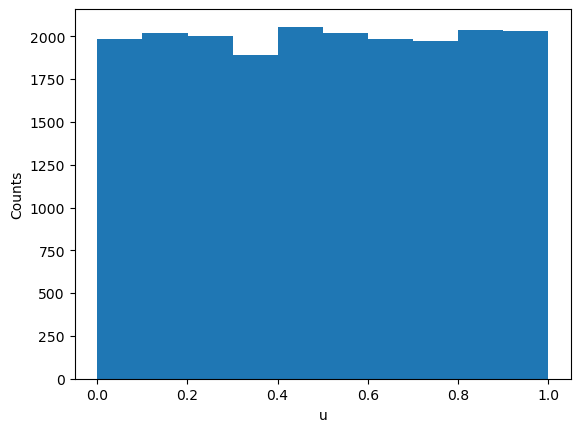

In [126]:
# Generate the u random variables and check the distribution
random_uniform = np.random.uniform(0, 1, 20000)

plt.hist(random_uniform)
plt.xlabel("u")
plt.ylabel("Counts")
plt.show()

In [127]:
# Generate Omega_m distribution by applying the inverse cumulative to u random numbers
omega_m_gen = interp_inverse_cumulative(random_uniform)

In [128]:
np.max(omega_m_gen)

np.float64(0.3367553312553394)

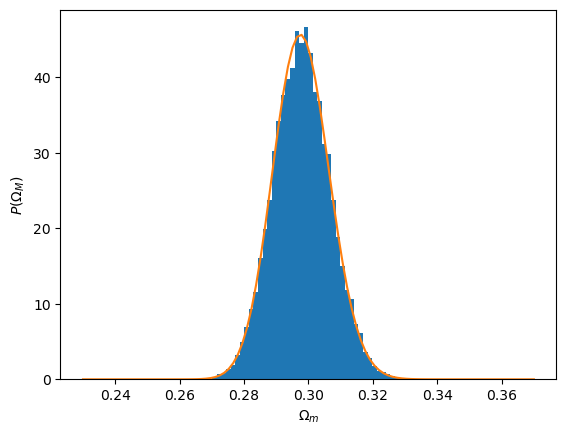

In [129]:
# Verify the distribution of the generated omega_m

_ = plt.hist(omega_m_gen, bins=50, density=True)
plt.xlabel(r"$\Omega_m$")
plt.ylabel(r"$P(\Omega_M)$")
plt.plot(omega_m_values, posterior)
plt.plot()
plt.show()

In [130]:
print("Omega_m : {mean:2.4f}+-{std:2.4f}".format(mean=np.mean(omega_m_gen), std=np.std(omega_m_gen)))

Omega_m : 0.2979+-0.0088


SECONDA PARTE : giorno successivo, lesson 14